In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import AgglomerativeClustering,KMeans
import warnings
warnings.filterwarnings("ignore")

In [15]:
X, y = make_blobs(
    n_samples=30,
    centers=3,
    cluster_std=1.0,
    random_state=42
)

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
linkage_matrix = linkage(X_scaled,method='ward')

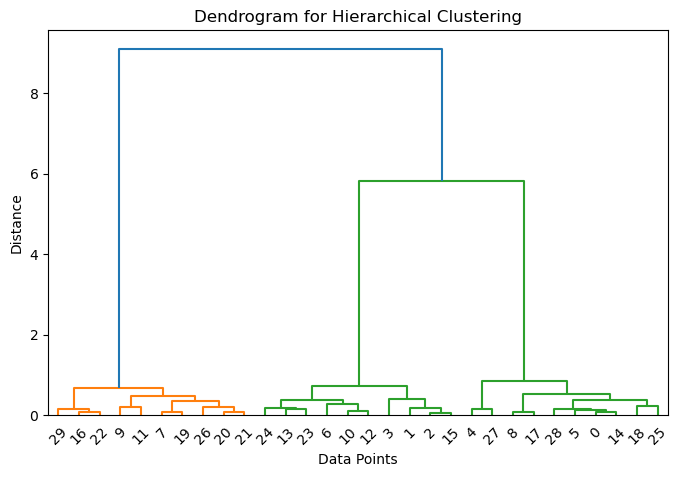

In [18]:
plt.figure(figsize=(8,5))
dendrogram(linkage_matrix)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [19]:
agg_model = AgglomerativeClustering(
    n_clusters=3,
    metric='euclidean',
    linkage='ward'
)
agg_labels = agg_model.fit_predict(X_scaled)

In [20]:
print("Cluster labels:",agg_labels)

Cluster labels: [0 2 2 2 0 0 2 1 0 1 2 1 2 2 0 2 1 0 0 1 1 1 1 2 2 0 1 0 0 1]


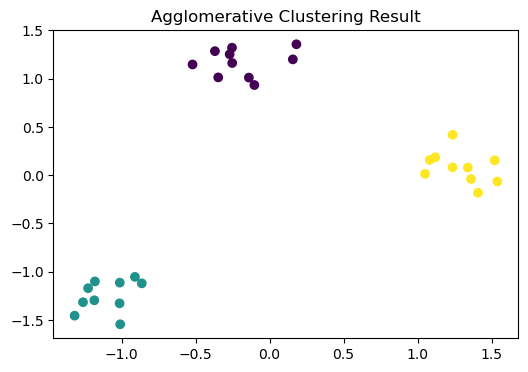

In [21]:
plt.figure(figsize=(6,4))
plt.scatter(X_scaled[:,0],X_scaled[:,1], c=agg_labels)
plt.title("Agglomerative Clustering Result")
plt.show()

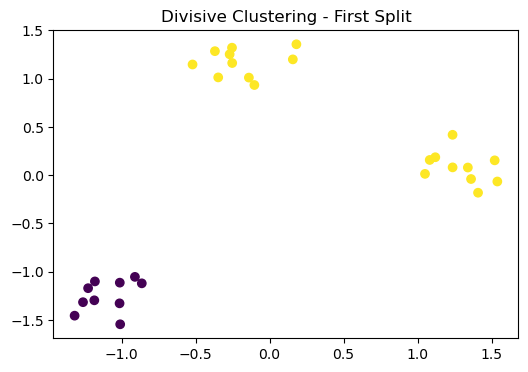

In [22]:
kmeans_1 = KMeans(n_clusters=2, random_state=42)
labels_level_1 = kmeans_1.fit_predict(X_scaled)
plt.figure(figsize=(6,4))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels_level_1)
plt.title("Divisive Clustering - First Split")
plt.show()

In [24]:
cluster_0 = X_scaled[labels_level_1==0]
kmeans_2 = KMeans(n_clusters=2, random_state=42)
labels_level_2 = kmeans_2.fit_predict(cluster_0)

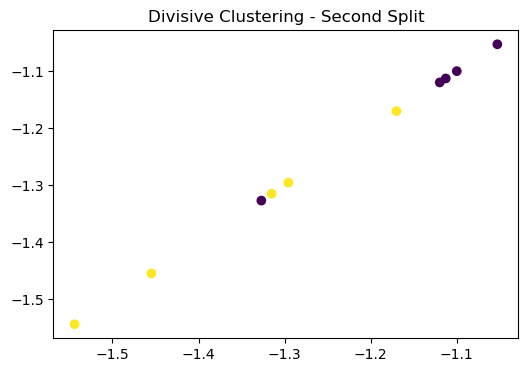

In [26]:
plt.figure(figsize=(6,4))
plt.scatter(cluster_0[:,1],cluster_0[:,1],c=labels_level_2)
plt.title("Divisive Clustering - Second Split")
plt.show()